<a href="https://colab.research.google.com/github/leohafsa/Parkinson-s-disease-detection-/blob/main/skeleton_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml==5.1
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

     |████████████████████████████████| 274 kB 5.1 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=72152c128be836755fa07881425d58529dd69d9fb9f37f7477d9bb2cd2ae9e79
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 763.5 MB 14 kB/s 
     |████████████████████████████████| 17.3 MB 175 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successf

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.8")   
import detectron2
from detectron2.utils.logger import setup_logger
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from torchvision import transforms as T

1.8.0+cu101 True


# **npy files**

In [ ]:
cd '/content/drive/MyDrive/transformed_data/'

/content/drive/MyDrive/transformed_data


In [ ]:

! python demo.py --config-file ../configs/COCO-Detection/faster_rcnn_R_50_C4_1x.yaml \
 --input /content/drive/MyDrive/fine_grained/CUB_200_2011/images/001.Black_footed_Albatross/ \
 --output /content/drive/MyDrive/fine_grained/output/ \
 --opts MODEL.WEIGHTS detectron2://ImageNetPretrained/MSRA/R-50.pkl


[09/28 07:33:24 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='../configs/COCO-Detection/faster_rcnn_R_50_C4_1x.yaml', input=['/content/drive/MyDrive/fine_grained/CUB_200_2011/images/001.Black_footed_Albatross/'], opts=['MODEL.WEIGHTS', 'detectron2://ImageNetPretrained/MSRA/R-50.pkl'], output='/content/drive/MyDrive/fine_grained/output/', video_input=None, webcam=False)
[09/28 07:33:29 fvcore.common.checkpoint]: [Checkpointer] Loading from detectron2://ImageNetPretrained/MSRA/R-50.pkl ...
R-50.pkl: 102MB [00:04, 25.0MB/s]               
[09/28 07:33:33 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
WARNING [09/28 07:33:33 d2.checkpoint.c2_model_loading]: Shape of res2.0.conv1.norm.bias in checkpoint is torch.Size([64]), while shape of backbone.bottom_up.res2.0.conv1.norm.bias in model is torch.Size([256]).
WARNING [09/28 07:33:33 d2.checkpoint.c2_model_loading]: res2.0.conv1.norm.bias will not be loaded. Please double check and see if this is 

In [ ]:

! python demo.py --config-file ../configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml  \
 --input /content/drive/MyDrive/transformed_data/train/abnormal  \
 --output /content/drive/MyDrive/npy_files/train/abnormal/ \
 --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl


[09/06 15:58:41 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='../configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml', input=['/content/drive/MyDrive/transformed_data/train/abnormal'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl'], output='/content/drive/MyDrive/npy_files/train/abnormal/', video_input=None, webcam=False)
[09/06 15:58:46 fvcore.common.checkpoint]: [Checkpointer] Loading from detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl ...
[09/06 15:58:46 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
WARNING [09/06 15:58:46 fvcore.common.checkpoint]: The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
[09/06 15:58:47 detectron2]: 1(0).jpg: detected 1 instances in 0.90s
/content/drive/MyDrive/npy_files/train/abnormal/1(0)


In [ ]:

! python demo.py --config-file ../configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml  \
 --input /content/drive/MyDrive/transformed_data/train/normal  \
 --output /content/drive/MyDrive/npy_files/train/normal/ \
 --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl


[09/06 17:20:01 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='../configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml', input=['/content/drive/MyDrive/transformed_data/train/normal'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl'], output='/content/drive/MyDrive/npy_files/train/normal/', video_input=None, webcam=False)
[09/06 17:20:06 fvcore.common.checkpoint]: [Checkpointer] Loading from detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl ...
[09/06 17:20:06 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
WARNING [09/06 17:20:06 fvcore.common.checkpoint]: The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
[09/06 17:20:07 detectron2]: N12(0).jpg: detected 1 instances in 0.91s
/content/drive/MyDrive/npy_files/train/normal/N12(0)
[0

In [ ]:

! python demo.py --config-file ../configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml  \
 --input /content/drive/MyDrive/transformed_data/test/normal  \
 --output /content/drive/MyDrive/npy_files/test/normal/ \
 --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl


[09/06 16:40:56 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='../configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml', input=['/content/drive/MyDrive/transformed_data/test/normal'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl'], output='/content/drive/MyDrive/npy_files/test/normal/', video_input=None, webcam=False)
[09/06 16:41:01 fvcore.common.checkpoint]: [Checkpointer] Loading from detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl ...
[09/06 16:41:01 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
WARNING [09/06 16:41:01 fvcore.common.checkpoint]: The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
[09/06 16:41:06 detectron2]: N10(0).jpg: detected 1 instances in 0.89s
/content/drive/MyDrive/npy_files/test/normal/N10(0)
[09/0

In [ ]:

! python demo.py --config-file ../configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml  \
 --input /content/drive/MyDrive/transformed_data/test/abnormal  \
 --output /content/drive/MyDrive/npy_files/test/abnormal/ \
 --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl


[09/06 16:51:06 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='../configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml', input=['/content/drive/MyDrive/transformed_data/test/abnormal'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl'], output='/content/drive/MyDrive/npy_files/test/abnormal/', video_input=None, webcam=False)
[09/06 16:51:11 fvcore.common.checkpoint]: [Checkpointer] Loading from detectron2://COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl ...
[09/06 16:51:11 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
WARNING [09/06 16:51:12 fvcore.common.checkpoint]: The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
[09/06 16:51:16 detectron2]: 14(0).jpg: detected 1 instances in 0.90s
/content/drive/MyDrive/npy_files/test/abnormal/14(0)
[

In [ ]:
import numpy as np
i=np.load('/content/drive/MyDrive/npy_files/test/abnormal/1(0).npy')
print(np.shape(i))
print(i)

(12, 3)
[[ 2.02972129e-01 -1.00998795e+00 -4.23554593e-04]
 [ 1.12762377e-01 -9.64932919e-01  1.09262485e-03]
 [ 2.48076811e-01 -4.39288288e-01  1.21612661e-03]
 [ 1.50349587e-01 -4.09251451e-01  1.77343993e-03]
 [ 3.53321701e-01 -1.87726617e-02  5.23231691e-04]
 [ 3.23251605e-01  2.62824893e-02  3.68257938e-03]
 [ 9.02097523e-02 -1.12635968e-02  9.95593582e-05]
 [-9.02097523e-02  1.12639787e-02 -9.95593582e-05]
 [ 1.50349587e-01  6.94601476e-01  1.69388927e-03]
 [-1.20279856e-01  7.32147932e-01  1.90830161e-03]
 [ 1.65384546e-01  1.40797639e+00  2.12933356e-03]
 [-3.08216840e-01  1.49057758e+00  1.90797332e-03]]


In [ ]:
import numpy as np
import cv2
i=np.load('/content/drive/MyDrive/npy_files/train/abnormal_features.npy')
print(np.shape(i))


In [ ]:
i=np.load('/content/drive/MyDrive/npy_files/test/normal_test_features.npy')
print(np.shape(i))

**Test data**

In [ ]:
import pandas as pd 
df = pd.DataFrame()
df['y']=" "
df.head()
fpath ='/content/drive/MyDrive/npy_files/test/normal_test_features.npy'
for i in range(64): 
            #print("image",file_im)
            df=df.append({'patient_id': i},ignore_index=True)
            df["y"][i]='0'
df.to_csv(r'/content/drive/MyDrive/npy_files/test/normal_test_features.csv')  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
import pandas as pd 
df2 = pd.DataFrame()
df2['y']=" "
df2.head()
fpath ='/content/drive/MyDrive/npy_files/test/abnormal_test_features.npy'
for i in range(64): 
            #print("image",file_im)
            df2=df2.append({'patient_id': i},ignore_index=True)
            df2["y"][i]='1'
df2.to_csv(r'/content/drive/MyDrive/npy_files/test/abnormal_test_features.csv')  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
import numpy as np
N_1=np.load('/content/drive/MyDrive/npy_files/test/normal_test_features.npy')
A_1=np.load('/content/drive/MyDrive/npy_files/test/abnormal_test_features.npy')
X_test=np.concatenate((N_1,A_1), axis=0)
print(np.shape(X_test))

(128, 1, 168)


In [ ]:
import pandas as pd 
test=pd.read_csv('/content/drive/MyDrive/npy_files/test/normal_test_features.csv')
Nl_1=test['y']
# print(Nl_1)
tst=pd.read_csv('/content/drive/MyDrive/npy_files/test/abnormal_test_features.csv')
Al_1=tst['y']
# print(Al_1)
Y_test=np.concatenate((Nl_1,Al_1), axis=0)
print(np.shape(Y_test))


(128,)


In [ ]:
print(Y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Training**

In [ ]:
import pandas as pd 
df = pd.DataFrame()
df['y']=" "
df.head()
fpath ='/content/drive/MyDrive/npy_files/train/normal_features.npy'
for i in range(96): 
            #print("image",file_im)
            df=df.append({'patient_id': i},ignore_index=True)
            df["y"][i]='0'
df.to_csv(r'/content/drive/MyDrive/npy_files/train/normal_feature.csv')                 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
import pandas as pd 
df2 = pd.DataFrame()
df2['y']=" "
df2.head()
fpath ='/content/drive/MyDrive/npy_files/train/abnormal_features.npy'
for i in range(96): 
            #print("image",file_im)
            df2=df2.append({'patient_id': i},ignore_index=True)
            df2["y"][i]='1'
df2.to_csv(r'/content/drive/MyDrive/npy_files/train/abnormal_feature.csv')                 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
N_1=np.load('/content/drive/MyDrive/npy_files/train/normal_features.npy')
A_1=np.load('/content/drive/MyDrive/npy_files/train/abnormal_features.npy')
X_train=np.concatenate((N_1,A_1), axis=0)
print(np.shape(X_train))

(192, 1, 168)


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/npy_files/train/normal_feature.csv')
Nl_1=train['y']
# print(Nl_1)
train2=pd.read_csv('/content/drive/MyDrive/npy_files/train/abnormal_feature.csv')
Al_1=train2['y']
# print(Al_1)
Y_train=np.concatenate((Nl_1,Al_1), axis=0)
print(np.shape(Y_train))
print(Y_train)

(192,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


**Graphs plotting**

In [ ]:
temp_list_accuracy=[]
temp_list_precision=[]
temp_list_recall=[]
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='lower right')
    plt.ylim([0,1])


In [ ]:
# splitting into test and train

# from sklearn.model_selection  import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.20,shuffle=True,random_state=1)

In [ ]:
print(np.shape(X_train))
xtrain=X_train.reshape(192,168)
print(np.shape(xtrain))

(192, 1, 168)
(192, 168)


**RNN**

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 168, 1)]          0         
_________________________________________________________________
rnn_3 (RNN)                  (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
39/39 - 2s - loss: 0.6913 - accuracy: 0.5260 - val_loss: 0.6888 - val_accuracy: 0.5469
Epoch 2/200
39/39 - 1s - loss: 0.6889 - accuracy: 0.5260 - val_loss: 0.6869 - val_accuracy: 0.5547
Epoch 3/200
39/39 - 1s - loss: 0.6866 - accuracy: 0.5521 - val_loss: 0.6863 - val_accuracy: 0.5469
Epoch 4/200
39/39 - 1s - loss: 0.6855 - accuracy: 0.5260 - val_loss: 0.6859 - val_accuracy: 0.56

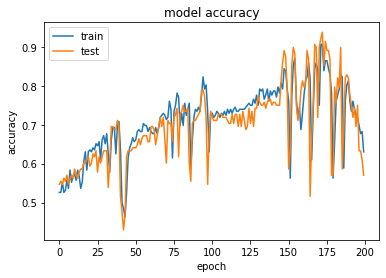

In [ ]:
input_dim =t_X_train.shape[1]  # Number of features
x = layers.Input(shape=(168, 1)) 
cell = layers.SimpleRNNCell(4, activation='tanh')  
rnn = layers.RNN(cell)
rnn_output = rnn(x)
output = layers.Dense(units=1, activation='sigmoid')(rnn_output)
model = keras.Model(inputs=x, outputs=output)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(t_X_train, Y_train,epochs=200,verbose=2,validation_data=(t_X_test, Y_test),batch_size=5)
loss, accuracy = model.evaluate(t_X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(t_X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
#summarize History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#Knn

In [ ]:
nsamples, nx, ny = X_train.shape
t_X_train = X_train.reshape((nsamples,nx*ny))
print(np.shape(t_X_train))

(192, 168)


In [ ]:
nsamples, nx, ny = X_test.shape
t_X_test = X_test.reshape((nsamples,nx*ny))
print(np.shape(t_X_test))

(128, 168)


In [ ]:
## 4 STEP MODELLING

# 1. import the class
from sklearn.neighbors import KNeighborsClassifier

# 2. instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

# 3. fit the model with data (occurs in-place)
Kl=knn.fit(t_X_train, Y_train)

In [ ]:

from sklearn.metrics import  confusion_matrix, accuracy_score
from sklearn import metrics
# predict class
y_pred_class = Kl.predict(t_X_test)
# predict probabilities
y_pred_proba =Kl.predict_proba(t_X_test)
accuracy=metrics.accuracy_score(Y_test, y_pred_class)
print("accuracy:" ,accuracy)
confusion = metrics.confusion_matrix(Y_test, y_pred_class)

#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]
precision = TP / float(TP + FP)
print("precision",precision)
Recall = TP / float(FN + TP)
print("Recall",Recall)
specificity = TN / float(TN + FP)
print("specificity",specificity)
print(confusion)
temp_list_precision.append(precision)
temp_list_recall.append(Recall)
temp_list_accuracy.append(accuracy)

accuracy: 0.8515625
precision 0.8082191780821918
Recall 0.921875
specificity 0.78125
[[50 14]
 [ 5 59]]


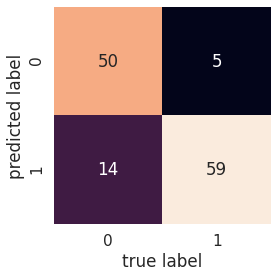

In [ ]:
#confusion matrix ploting
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(Y_test, y_pred_class)
sns.set(font_scale=1.4)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

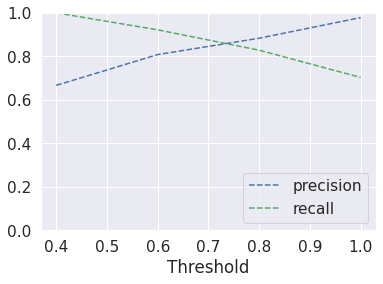

In [ ]:
# example of a precision-recall curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
# predict probabilities
y_scores=Kl.predict_proba(t_X_test)
prec, rec, tre = precision_recall_curve(Y_test, y_scores[:,1],)
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()


# **SVM**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

**Kernel Sigmoid**

[[16 48]
 [ 6 58]]
precision 0.5471698113207547
Recall 0.90625
specificity 0.25
Accuracy 0.578125


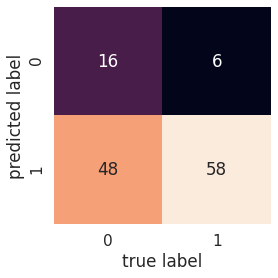

In [ ]:
clf = svm.SVC(kernel='sigmoid', C=1,probability=True).fit(t_X_train, Y_train)
clf.score(t_X_test, Y_test)
y_pred_class2 = clf.predict(t_X_test)
accuracy2=metrics.accuracy_score(Y_test, y_pred_class2)
confusion2 = metrics.confusion_matrix(Y_test, y_pred_class2)
print(confusion2)
#[row, column]
TN2 = confusion2[0, 0]
FP2 = confusion2[0, 1]
FN2 = confusion2[1, 0]
TP2 = confusion2[1, 1]
precision2 = TP2 / float(TP2 + FP2)
print("precision",precision2)
Recall2 = TP2 / float(FN2 + TP2)
print("Recall",Recall2)
specificity2 = TN2 / float(TN2 + FP2)
print("specificity",specificity2)
print("Accuracy",accuracy2)
temp_list_accuracy.append(accuracy2)
temp_list_precision.append(precision2)
temp_list_recall.append(Recall2)
#confusion matrix ploting
mat=confusion_matrix(Y_test, y_pred_class2)
sns.set(font_scale=1.4)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
# predict probabilities


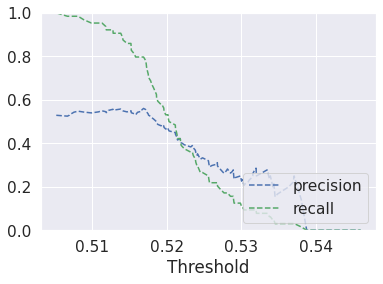

In [ ]:
y_scores2=clf.predict_proba(t_X_test)
prec, rec, tre = precision_recall_curve(Y_test, y_scores2[:,1],)
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**Kernel Linear**

[[45 19]
 [14 50]]
precision 0.7246376811594203
Recall 0.78125
specificity 0.703125
Accuracy 0.7421875


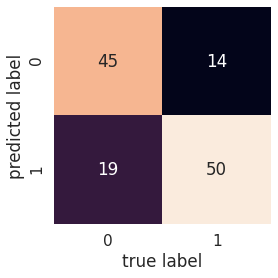

In [ ]:
clf_l = svm.SVC(kernel='linear', C=1,probability=True).fit(t_X_train, Y_train)
clf_l.score(t_X_test, Y_test)
y_pred_class_3 = clf_l.predict(t_X_test)
accuracy2=metrics.accuracy_score(Y_test, y_pred_class_3)
confusion2 = metrics.confusion_matrix(Y_test, y_pred_class_3 )
print(confusion2)
#[row, column]
TN2 = confusion2[0, 0]
FP2 = confusion2[0, 1]
FN2 = confusion2[1, 0]
TP2 = confusion2[1, 1]
precision2 = TP2 / float(TP2 + FP2)
print("precision",precision2)
Recall2 = TP2 / float(FN2 + TP2)
print("Recall",Recall2)
specificity2 = TN2 / float(TN2 + FP2)
print("specificity",specificity2)
print("Accuracy",accuracy2)
temp_list_accuracy.append(accuracy2)
temp_list_precision.append(precision2)
temp_list_recall.append(Recall2)
#confusion matrix ploting
mat=confusion_matrix(Y_test, y_pred_class_3 )
sns.set(font_scale=1.4)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
# predict probabilities


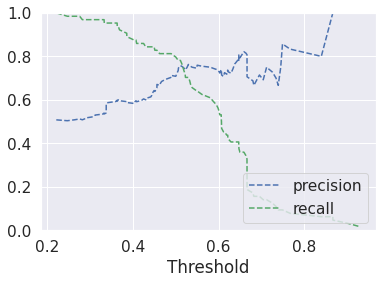

In [ ]:
y_scores3=clf_l.predict_proba(t_X_test)
prec, rec, tre = precision_recall_curve(Y_test, y_scores3[:,1],)
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**Kernel Poly**

[[50 14]
 [26 38]]
precision 0.7307692307692307
Recall 0.59375
specificity 0.78125
Accuracy 0.6875


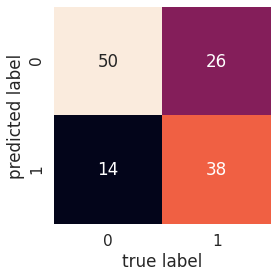

In [ ]:
clf_poly = svm.SVC(kernel='poly', C=1,probability=True).fit(t_X_train, Y_train)
clf_poly.score(t_X_test, Y_test)
y_pred_class_4 = clf_poly.predict(t_X_test)
accuracy2=metrics.accuracy_score(Y_test, y_pred_class_4)
confusion2 = metrics.confusion_matrix(Y_test, y_pred_class_4)
print(confusion2)
#[row, column]
TN2 = confusion2[0, 0]
FP2 = confusion2[0, 1]
FN2 = confusion2[1, 0]
TP2 = confusion2[1, 1]
precision2 = TP2 / float(TP2 + FP2)
print("precision",precision2)
Recall2 = TP2 / float(FN2 + TP2)
print("Recall",Recall2)
specificity2 = TN2 / float(TN2 + FP2)
print("specificity",specificity2)
print("Accuracy",accuracy2)
temp_list_accuracy.append(accuracy2)
temp_list_precision.append(precision2)
temp_list_recall.append(Recall2)
#confusion matrix ploting
mat=confusion_matrix(Y_test, y_pred_class_4)
sns.set(font_scale=1.4)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


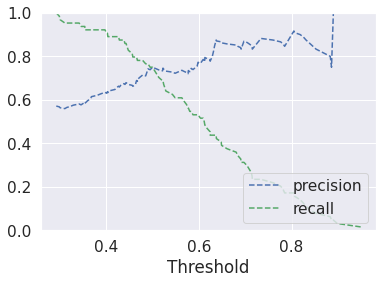

In [ ]:
# predict probabilities
y_scores4=clf_poly.predict_proba(t_X_test)
prec, rec, tre = precision_recall_curve(Y_test, y_scores4[:,1],)
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**Kernel Gaussian**

[[37 27]
 [10 54]]
precision 0.6666666666666666
Recall 0.84375
specificity 0.578125
Accuracy 0.7109375


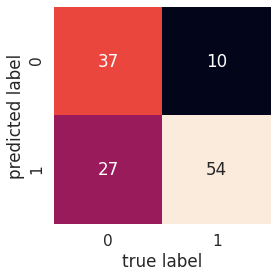

In [ ]:
clf_rbf = svm.SVC(kernel='rbf', C=1,probability=True).fit(t_X_train, Y_train)
clf_rbf.score(t_X_test, Y_test)
y_pred_class5 =clf_rbf.predict(t_X_test)
accuracy2=metrics.accuracy_score(Y_test, y_pred_class5)
confusion2 = metrics.confusion_matrix(Y_test, y_pred_class5)
print(confusion2)
#[row, column]
TN2 = confusion2[0, 0]
FP2 = confusion2[0, 1]
FN2 = confusion2[1, 0]
TP2 = confusion2[1, 1]
precision2 = TP2 / float(TP2 + FP2)
print("precision",precision2)
Recall2 = TP2 / float(FN2 + TP2)
print("Recall",Recall2)
specificity2 = TN2 / float(TN2 + FP2)
print("specificity",specificity2)
print("Accuracy",accuracy2)
temp_list_accuracy.append(accuracy2)
temp_list_precision.append(precision2)
temp_list_recall.append(Recall2)
#confusion matrix ploting
mat=confusion_matrix(Y_test, y_pred_class5)
sns.set(font_scale=1.4)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


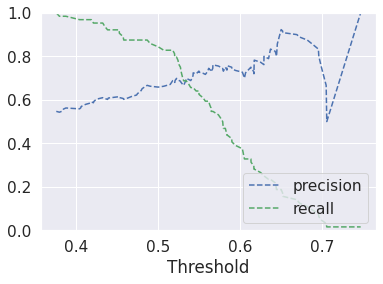

In [ ]:
# predict probabilities
y_scores5=clf_rbf.predict_proba(t_X_test)
prec, rec, tre = precision_recall_curve(Y_test, y_scores5[:,1],)
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

# Decision tree

[[16 48]
 [ 6 58]]
precision 0.5471698113207547
Recall 0.90625
specificity 0.25
Accuracy 0.578125


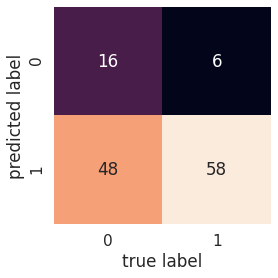

In [ ]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(random_state=40)
clf_dt = clf.fit(t_X_train,Y_train)
clf_dt.score(t_X_test, Y_test)
y_pred_class_dt = clf.predict(t_X_test)
metrics.accuracy_score(Y_test, y_pred_class_dt)
accuracy3=metrics.accuracy_score(Y_test, y_pred_class_dt)
confusion3 = metrics.confusion_matrix(Y_test, y_pred_class_dt)
print(confusion3)
#[row, column]
TN = confusion3[0, 0]
FP = confusion3[0, 1]
FN = confusion3[1, 0]
TP = confusion3[1, 1]
precision3 = TP / float(TP + FP)
print("precision",precision3)
Recall3 = TP / float(FN + TP)
print("Recall",Recall3)
specificity3 = TN / float(TN + FP)
print("specificity",specificity3)
print("Accuracy", accuracy3)
temp_list_accuracy.append(accuracy3)
temp_list_precision.append(precision3)
temp_list_recall.append(Recall3)
#confusion matrix ploting
mat=confusion_matrix(Y_test, y_pred_class_dt)
sns.set(font_scale=1.4)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
# predict probabilities


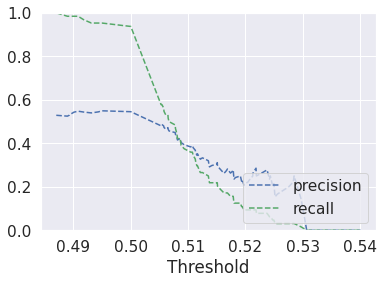

In [ ]:
y_scores_dt=clf_dt.predict_proba(t_X_test)
prec, rec, tre = precision_recall_curve(Y_test, y_scores_dt[:,1],)
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**ANN**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1690      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
39/39 - 1s - loss: 0.7358 - accuracy: 0.5312 - val_loss: 0.6931 - val_accuracy: 0.5703
Epoch 2/100
39/39 - 0s - loss: 0.6952 - accuracy: 0.5417 - val_loss: 0.6775 - val_accuracy: 0.6016
Epoch 3/100
39/39 - 0s - loss: 0.6759 - accuracy: 0.5833 - val_loss: 0.6649 - val_accuracy: 0.6328
Epoch 4/100
39/39 - 0s - loss: 0.6511 - accuracy: 0.7031 - val_loss: 0.6401 - val_accuracy: 0.6484
Epoch 5/100
39/39 - 0s - loss: 0.6317 - accuracy: 0.6927 - val_loss: 0.6246 - val_accuracy: 0.6641
Epoch 6/100
39/39 - 0

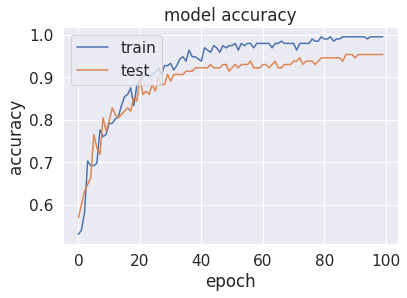

In [ ]:

# Algoritham

from keras.models import Sequential
from keras import layers

input_dim =t_X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(t_X_train, Y_train,epochs=100,verbose=2,validation_data=(t_X_test, Y_test),batch_size=5)
loss, accuracy = model.evaluate(t_X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(t_X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
#summarize History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Text(0.5, 1.0, 'Loss Curves')

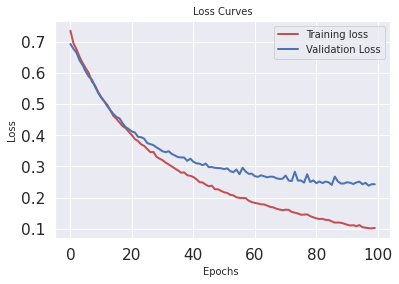

In [ ]:

# Loss Curves
#plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
#plt.grid()
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)

# **Random Forest**

Accuracy: 0.9765625
[[62  2]
 [ 1 63]]
precision 0.9692307692307692
Recall 0.984375
specificity 0.96875


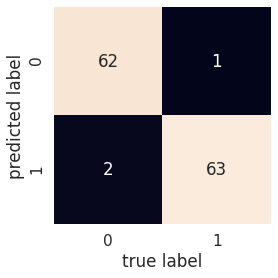

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(t_X_train,Y_train)
y_pred=clf_rf.predict(t_X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
confusion3 = metrics.confusion_matrix(Y_test, y_pred)
print(confusion3)
#[row, column]
TN = confusion3[0, 0]
FP = confusion3[0, 1]
FN = confusion3[1, 0]
TP = confusion3[1, 1]
precision3 = TP / float(TP + FP)
print("precision",precision3)
Recall3 = TP / float(FN + TP)
print("Recall",Recall3)
specificity3 = TN / float(TN + FP)
print("specificity",specificity3)
temp_list_accuracy.append(accuracy3)
temp_list_precision.append(precision3)
temp_list_recall.append(Recall3)
#confusion matrix ploting
mat=confusion_matrix(Y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
# predict probabilities

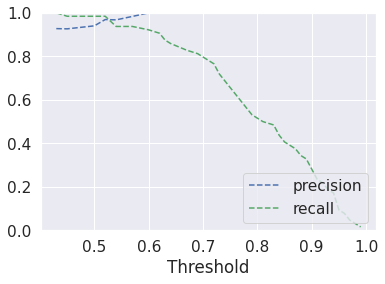

In [ ]:
y_scores_rf=clf_rf.predict_proba(t_X_test)
prec, rec, tre = precision_recall_curve(Y_test, y_scores_rf[:,1],)
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**n_estimators=45**

Accuracy: 0.953125
[[61  3]
 [ 3 61]]
precision 0.953125
Recall 0.953125
specificity 0.953125


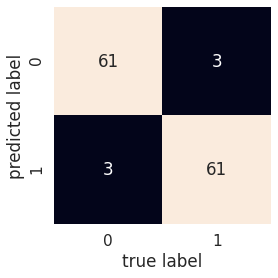

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf12=RandomForestClassifier(n_estimators=45)
clf12.fit(t_X_train,Y_train)
y_pred12=clf12.predict(t_X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred12))
#confusion matrix ploting
confusion3 = metrics.confusion_matrix(Y_test, y_pred12)
print(confusion3)
#[row, column]
TN = confusion3[0, 0]
FP = confusion3[0, 1]
FN = confusion3[1, 0]
TP = confusion3[1, 1]
precision3 = TP / float(TP + FP)
print("precision",precision3)
Recall3 = TP / float(FN + TP)
print("Recall",Recall3)
specificity3 = TN / float(TN + FP)
print("specificity",specificity3)
temp_list_accuracy.append(accuracy)
temp_list_precision.append(precision3)
temp_list_recall.append(Recall3)
#confusion matrix ploting
mat=confusion_matrix(Y_test, y_pred12)
sns.set(font_scale=1.4)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
# predict probabilities


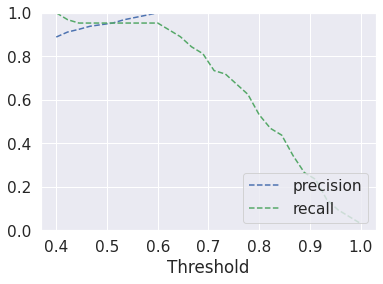

In [ ]:
y_scores_12=clf12.predict_proba(t_X_test)
prec, rec, tre = precision_recall_curve(Y_test, y_scores_12[:,1],)
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**n_estimators=70**

Accuracy: 0.9921875
[[64  0]
 [ 1 63]]
precision 1.0
Recall 0.984375
specificity 1.0


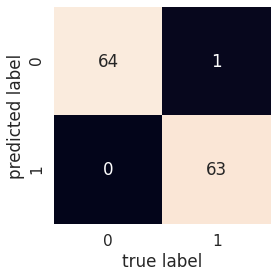

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf40=RandomForestClassifier(n_estimators=70)
clf40.fit(t_X_train,Y_train)
y_pred40=clf40.predict(t_X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred40))
#confusion matrix ploting
confusion3 = metrics.confusion_matrix(Y_test, y_pred40)
print(confusion3)
#[row, column]
TN = confusion3[0, 0]
FP = confusion3[0, 1]
FN = confusion3[1, 0]
TP = confusion3[1, 1]
precision3 = TP / float(TP + FP)
print("precision",precision3)
Recall3 = TP / float(FN + TP)
print("Recall",Recall3)
specificity3 = TN / float(TN + FP)
print("specificity",specificity3)
temp_list_accuracy.append(accuracy3)
temp_list_precision.append(precision3)
temp_list_recall.append(Recall3)
#confusion matrix ploting
mat=confusion_matrix(Y_test, y_pred40)
sns.set(font_scale=1.4)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
# predict probabilities

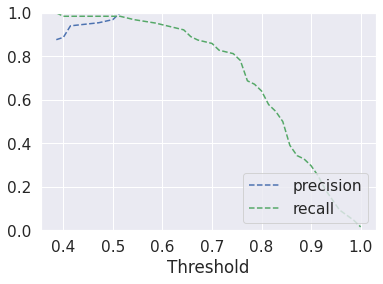

In [ ]:
y_scores_40=clf40.predict_proba(t_X_test)
prec, rec, tre = precision_recall_curve(Y_test, y_scores_40[:,1],)
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()